<a href="https://colab.research.google.com/github/vijaytamilselvan/neural-net-from-scratch/blob/main/makemore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
words=open('/Users/vijay-7262/Downloads/names.txt','r').read()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/vijay-7262/Downloads/names.txt'

In [1]:
from google.colab import files
uploaded = files.upload()


Saving names.txt to names.txt


In [2]:
words= open('names.txt','r').read().splitlines()
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [ ]:
len(words)

32033

In [3]:
import torch
N= torch.zeros((28,28),dtype=torch.int32)


In [4]:
chars=sorted(list(set(''.join(words))))
stoi={s:i+1 for i,s in enumerate(chars)}
#i+1 is made to initialize speacial character "." for the "0"
stoi['.']=0
stoi
itos={i:s for s,i in stoi.items()}
itos
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [6]:
for w in words:
  chs=['.']+list(w)+['.']
  for ch1,ch2 in zip(chs,chs[1:]):
    ix1=stoi[ch1]
    ix2=stoi[ch2]
    N[ix1,ix2]+=1


NameError: name 'itos' is not defined

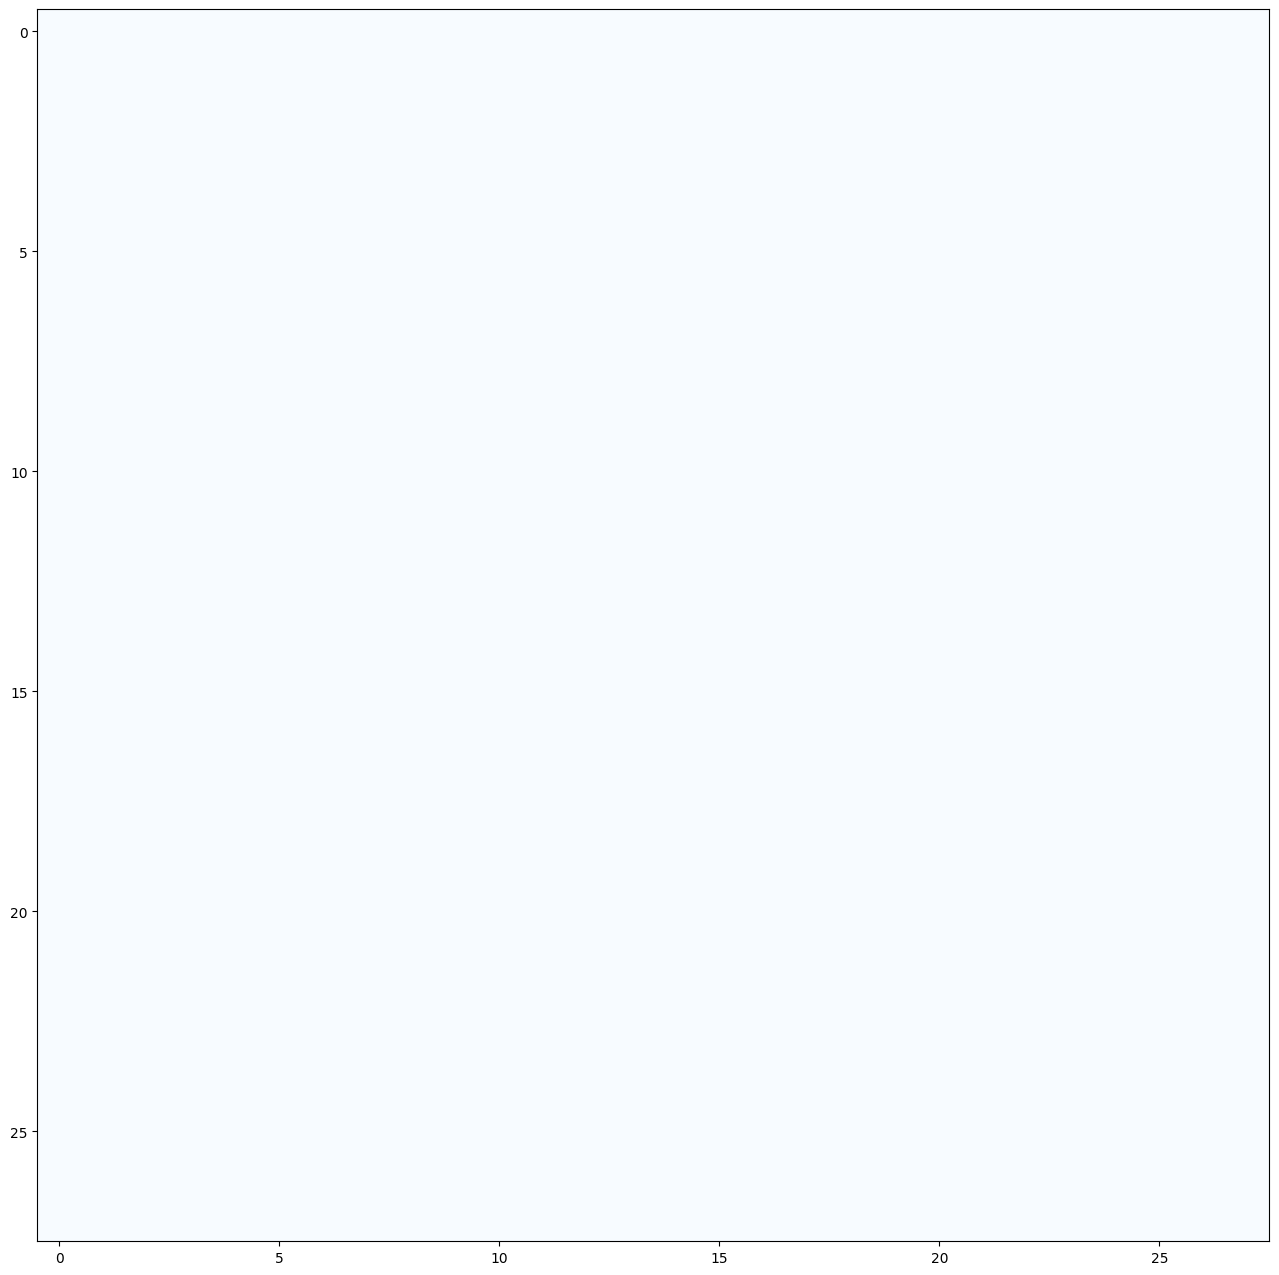

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N,cmap='Blues')
for i in range(27):
  for j in range(27):
    chstr=itos[i]+itos[j]
    plt.text(j,i, chstr, ha="center", va="bottom", color='gray')
    plt.text(j,i, N[i,j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [7]:
P=(N+1).float()
#N+1 is included as a laplace smoothing as probabilities leads to zero when thr is no combination appears in N. So we have made 1 as a default.
P/=P.sum(1,keepdim=True) # sum over the columns
print(P)

tensor([[3.1191e-05, 1.3758e-01, 4.0766e-02, 4.8127e-02, 5.2743e-02, 4.7784e-02,
         1.3038e-02, 2.0898e-02, 2.7292e-02, 1.8465e-02, 7.5575e-02, 9.2449e-02,
         4.9063e-02, 7.9193e-02, 3.5776e-02, 1.2320e-02, 1.6094e-02, 2.9007e-03,
         5.1152e-02, 6.4128e-02, 4.0828e-02, 2.4641e-03, 1.1759e-02, 9.6067e-03,
         4.2107e-03, 1.6718e-02, 2.9007e-02, 3.1191e-05],
        [1.9582e-01, 1.6424e-02, 1.5982e-02, 1.3888e-02, 3.0755e-02, 2.0435e-02,
         3.9808e-03, 4.9833e-03, 6.8794e-02, 4.8683e-02, 5.1898e-03, 1.6778e-02,
         7.4573e-02, 4.8212e-02, 1.6038e-01, 1.8872e-03, 2.4474e-03, 1.7987e-03,
         9.6276e-02, 3.2996e-02, 2.0287e-02, 1.1264e-02, 2.4622e-02, 4.7769e-03,
         5.3962e-03, 6.0478e-02, 1.2856e-02, 2.9487e-05],
        [4.3023e-02, 1.2046e-01, 1.4590e-02, 7.4822e-04, 2.4691e-02, 2.4542e-01,
         3.7411e-04, 3.7411e-04, 1.5713e-02, 8.1556e-02, 7.4822e-04, 3.7411e-04,
         3.8908e-02, 3.7411e-04, 1.8706e-03, 3.9656e-02, 3.7411e-04, 3.741

In [10]:
g= torch.Generator().manual_seed(2147483647)

for i in range(50):

  out=[]
  ix=0

  while True:
    p=P[ix]
    ix=torch.multinomial(p,num_samples=1,replacement=True,generator=g).item()

    out.append(itos[ix])
    if ix==0:
      break
  print(''.join(out))



junide.
janasah.
p.
cony.
a.
nn.
kohin.
tolian.
juee.
ksahnaauranilevias.
dedainrwieta.
ssonielylarte.
faveumerifontume.
phynslenaruani.
core.
yaenon.
ka.
jabdinerimikimaynin.
anaasn.
ssorionsush.
dgossmitan.
il.
le.
pann.
that.
janreli.
isa.
dyn.
rijelumemahaunayaleva.
cararr.
jen.
janarta.
maly.
abely.
a.
i.
lavadoni.
themielyawat.
f.
modam.
tavilitikiesaloeverin.
n.
e.
kalbrenelah.
anen.
ch.
k.
jan.
odridrdenanialilpergha.
tezralelia.


In [18]:
Computing the log_likelihood as computing with probabilities are difficult as it can leads to zero. So computing log which would be easier to optimize.

SyntaxError: invalid syntax (<ipython-input-18-4a349a5a0ba7>, line 1)

In [9]:
# log likelihood represents how likely the model predicts the correct output.

log_likelihood=0.0
n=0
#for w in words[:3]:
for w in ["vijajqp"]:
  chs=['.']+list(w)+['.']
  for ch1,ch2 in zip(chs,chs[1:]):
    ix1=stoi[ch1]
    ix2=stoi[ch2]
    N[ix1,ix2]+=1
    prob=P[ix1][ix2]
    logprob=torch.log(prob)
    log_likelihood+=logprob
    n+=1
    print(f'{ch1}{ch2}: {prob:.4f}')

print(f'{log_likelihood=}')
nll=-log_likelihood
print(f'{nll=}')
print(f'{nll/n=}')


.v: 0.0118
vi: 0.3506
ij: 0.0043
ja: 0.5034
aj: 0.0052
jq: 0.0003
qp: 0.0033
p.: 0.0323
log_likelihood=tensor(-33.9976)
nll=tensor(33.9976)
nll/n=tensor(4.2497)


One-hot vector encoding

In [90]:
#Taking each character in the word and then convert them into integer and then
#form a tensor to give it as input to the model

xs=[]
ys=[]
for w in words:
  chs=['.']+list(w)+['.']
  for ch1,ch2 in zip(chs,chs[1:]):
    ix1=stoi[ch1]
    ix2=stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)

xs=torch.tensor(xs)
ys=torch.tensor(ys)

xs.shape





torch.Size([228146])

In [92]:
#one-hot vector encoding to convert the int to vector
import torch.nn.functional as F
xenc=F.one_hot(xs,num_classes=27).float()
xenc.shape


torch.Size([228146, 27])

In [93]:
g=torch.Generator().manual_seed(2147483647)
W=torch.randn((27,27),generator=g,requires_grad=True)

In [95]:
#forward- pass

#f=wx+b

xenc.dtype
logits=(xenc@W)
counts=logits.exp()
probs=counts/counts.sum(1,keepdims=True)
probs.shape
#probs are nothing but the predicted vector distribution of the next character for each character from the word passed

torch.Size([228146, 27])

In [96]:
#Plucking the probablities from probs using torch.arange

loss=-probs[torch.arange(228146),ys].log().mean()
loss.item()

#I have already found the probabilities and have 27 class of prob for each input sample passed.
#Lets say, 5 samples with 27 classes are passed. probs contains [5,27] shape of tensor.
#In this probs, I am calculating the loss by finding the prob assigned to the ground output and then penalize it.

#negative log-likelihood is the cross-entropy loss using which we can identify the model's capability.




3.758953809738159

In [97]:
#backward-pass
W.grad= None
loss.backward()


In [98]:
W.data+= -0.1*W.grad

In [101]:
#Now, we have the loss. Optimization needs to be done to minimize the loss.
losses = {}
loss_curve=[]

for i in range(5):
    print("Batch-"+f'{i}')

    for i in range(100):
        logits=(xenc@W)
        counts=logits.exp()
        probs=counts/counts.sum(1,keepdims=True)
        probs.shape

        loss=-probs[torch.arange(228146),ys].log().mean()+0.01*(W**2).mean()
        loss.item()

        #backward-pass
        W.grad= None
        loss.backward()
        W.data+= -0.1*W.grad
        print(loss.item())
        loss_curve.append(loss.item())

    losses[lr] = loss_curve


#The loss keeps on decreasing each time we run the loop, which depicts that the correct probability is been assigned to the correct output class.
#forwardpass, grad and backward pass will be the same for all. except the fact we need to change how weights can be calculated


Batch-0
3.744917154312134
3.7440195083618164
3.7431232929229736
3.742227792739868
3.7413339614868164
3.7404403686523438
3.7395479679107666
3.738656997680664
3.737767457962036
3.736877679824829
3.735989809036255
3.735102415084839
3.7342164516448975
3.7333309650421143
3.7324471473693848
3.7315638065338135
3.7306814193725586
3.7298004627227783
3.7289202213287354
3.728040933609009
3.7271628379821777
3.726285457611084
3.7254092693328857
3.724534511566162
3.7236602306365967
3.7227866649627686
3.7219138145446777
3.7210426330566406
3.72017240524292
3.7193028926849365
3.7184345722198486
3.71756649017334
3.716700315475464
3.715834617614746
3.7149698734283447
3.714106321334839
3.7132439613342285
3.7123820781707764
3.7115211486816406
3.7106614112854004
3.7098021507263184
3.708944082260132
3.70808744430542
3.707231283187866
3.70637583732605
3.705521821975708
3.7046682834625244
3.7038164138793945
3.7029645442962646
3.7021141052246094
3.7012643814086914
3.700416088104248
3.699568271636963
3.698721647

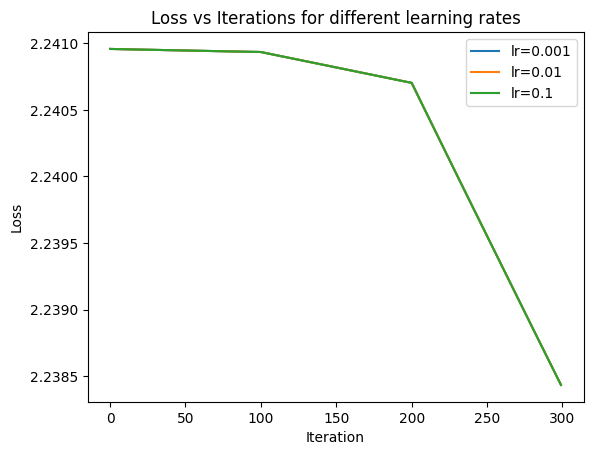

In [91]:
import matplotlib.pyplot as plt

for lr, loss_curve in losses.items():
    plt.plot(loss_curve, label=f"lr={lr}")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss vs Iterations for different learning rates")
plt.show()


In [104]:
#This is another way of training the model by calculating the number of bigrams and

g= torch.Generator().manual_seed(2147483647)

for i in range(5):

  out=[]
  ix=0

  while True:
    xenc=F.one_hot(torch.tensor([ix]),num_classes=27).float()

    logits=(xenc@W)
    counts=logits.exp()
    p=counts/counts.sum(1,keepdims=True)
    ix=torch.multinomial(p,num_samples=1,replacement=True,generator=g).item()

    out.append(itos[ix])
    if ix==0:
      break
  print(''.join(out))

juwjdjdjawcqydjufhqyywecnw.
.
oiin.
toziasz.
gwt.
